<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/Assignment_Iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

df = pd.concat([X, y], axis=1)
print("Data loaded and combined:")
print(df.head(4))

Data loaded and combined:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   

   species  
0        0  
1        0  
2        0  
3        0  


In [11]:
print(df.head(4))
print(df['species'].value_counts())
print(df.describe())
print(df.isnull().sum())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
species
0    50
1    50
2    50
Name: count, dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000  

In [12]:
sepal_width_1 = df['sepal width (cm)']
sepal_width_2 = df.iloc[:, 1]

petal_length_slice = df.loc[50:99, 'petal length (cm)']
petal_width_filtered = df[df['petal width (cm)'] > 0.2]['petal width (cm)']

print("Examples of extracted data:")
print(sepal_width_1.head())
print(petal_length_slice.head())
print(petal_width_filtered.head())

Examples of extracted data:
0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64
50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal length (cm), dtype: float64
5     0.4
6     0.3
15    0.4
16    0.4
17    0.3
Name: petal width (cm), dtype: float64


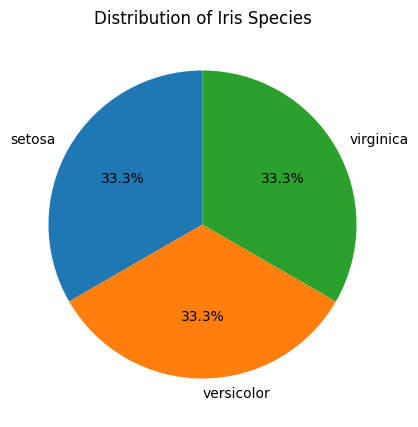

In [13]:
species_counts = df['species'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(species_counts, labels=iris.target_names, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Iris Species")
plt.show()

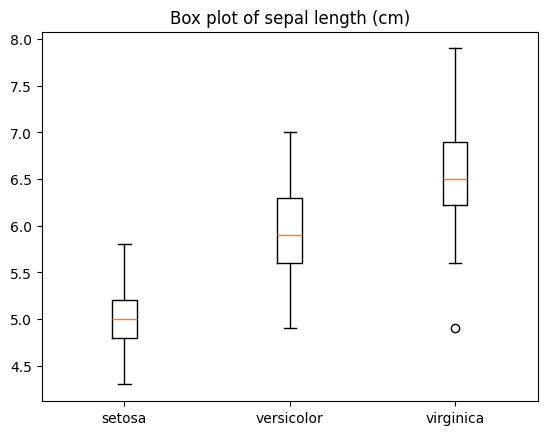

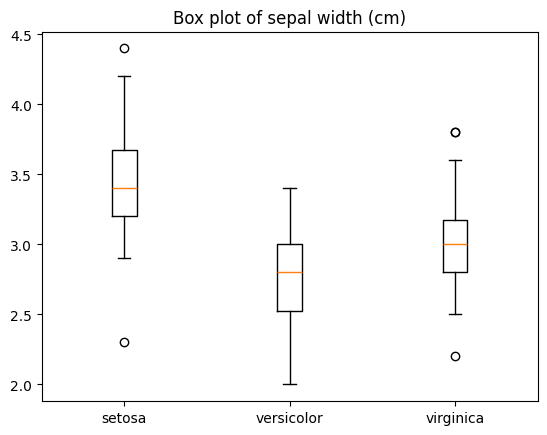

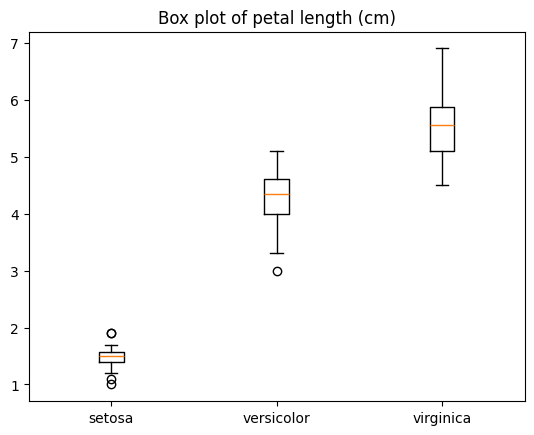

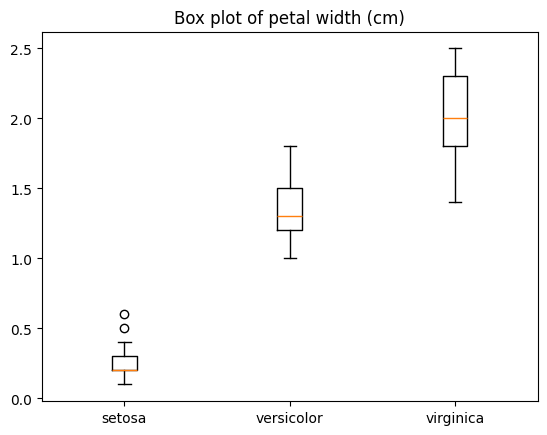

In [14]:
for feature in iris.feature_names:
    plt.figure()
    for i, species_name in enumerate(iris.target_names):
        plt.boxplot(df[df['species']==i][feature], positions=[i])
    plt.xticks(range(len(iris.target_names)), iris.target_names)
    plt.title(f'Box plot of {feature}')
    plt.show()

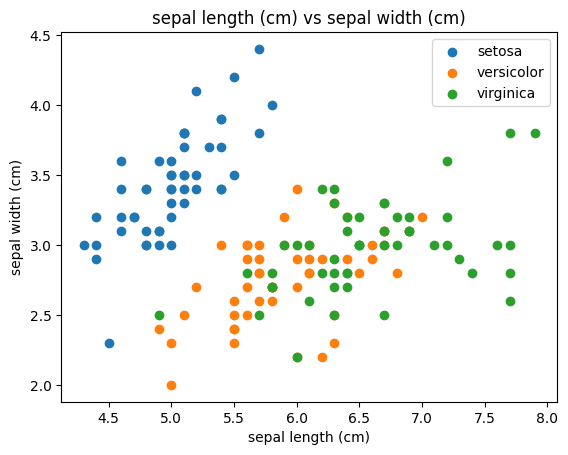

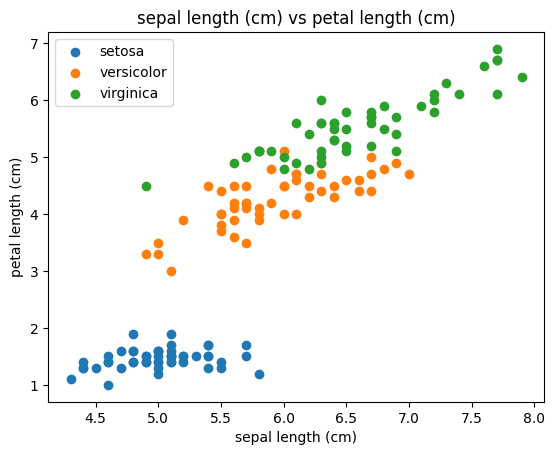

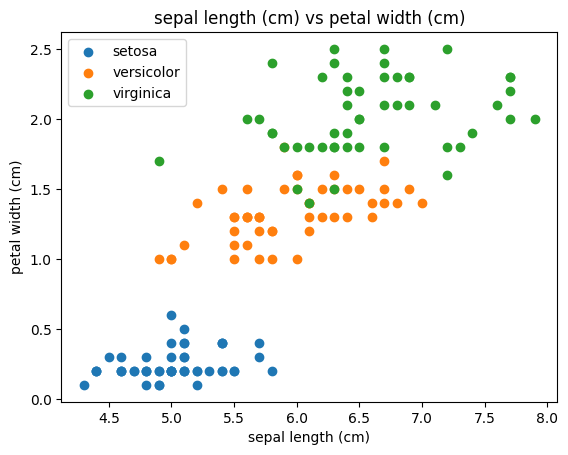

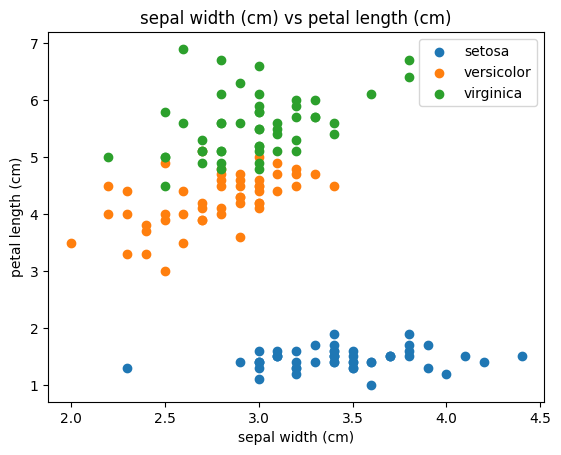

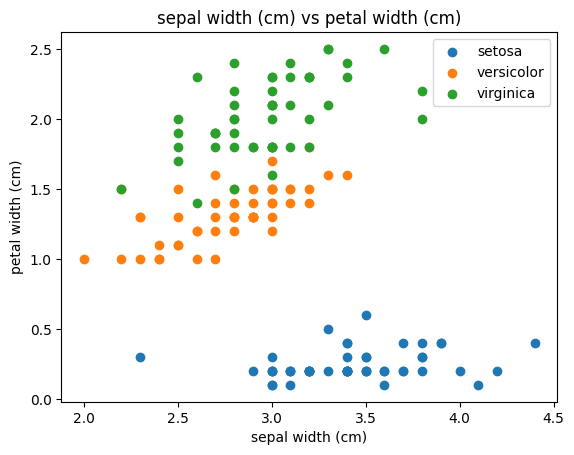

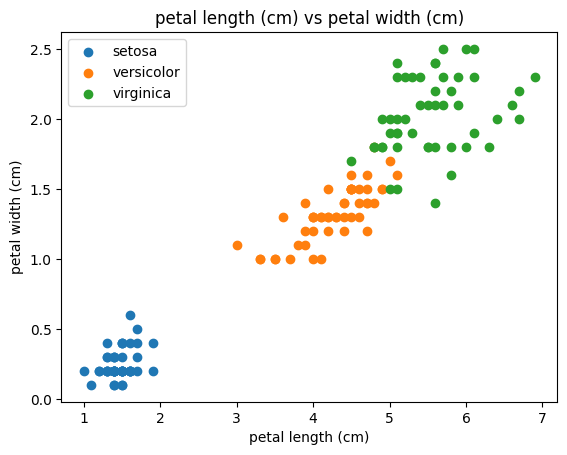

In [15]:
feature_names = iris.feature_names
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        plt.figure()
        for k, species_name in enumerate(iris.target_names):
            subset = df[df['species']==k]
            plt.scatter(subset[feature_names[i]], subset[feature_names[j]], label=species_name)
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend()
        plt.title(f'{feature_names[i]} vs {feature_names[j]}')
        plt.show()

In [16]:
corr_matrix = df.iloc[:, :4].corr()
print("\nCorrelation matrix:\n", corr_matrix)


Correlation matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


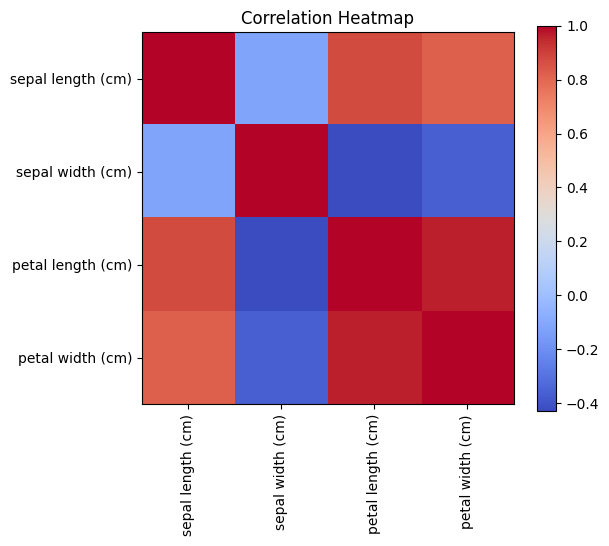

In [17]:
plt.figure(figsize=(6,5))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(4), feature_names, rotation=90)
plt.yticks(range(4), feature_names)
plt.title("Correlation Heatmap")
plt.show()